# An analysis of trade-offs between hits, homeruns, and strikeouts¶



**1. Introduction**
<br>
<br>
This analysis addresses whether there is any trade-off between a hitter's power (measured in HRs) and other baseball perfomance metrics? Is hitting a high number of homeruns indicative of a good baseball hitter or simply a certain *type* of baseball hitter? Do these homeruns come at the expense of a lower batting average or higher strikeout rate, or are these metrics positively correlated? Will a hitter with a lot of homeruns also tend to have a higher than usual batting average and a lower than average strikeout rate?

In [5]:
# Import necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import data as pandas Dataframe

batting_df = pd.read_csv("batting.csv")

**2. Batting Metrics Correlation by Year**

To explore the questions above, let's first look to see how the different performance metrics have changed throughout the years. There might be some evidence of a relationship between the different variables.

In [8]:
battingyear_df = batting_df.groupby("yearID").sum()


I've created some new metrics/statistics from the data provided that will help us better analyze a player's performance. Specifically, it is more useful to look at homeruns, stikeouts, and hits relative to at bats than take those numbers by themselves as totals. Since we will use these relative statistcs throughout the analysis, I've created a formula to be called when needed.

In [9]:
def get_stats_per_ab (data):
    '''Takes in Dataframe and returns a new Dataframe looking at hits, strikouts, and hrs per ab'''
    batting_avg = data["H"]/data["AB"]
    sos_per_ab = data["SO"]/data["AB"]
    hrs_per_ab = data["HR"]/data["AB"]
    dataframe = pd.concat([batting_avg,sos_per_ab,hrs_per_ab], axis=1)
    dataframe.columns = ["Avg", "SO/AB", "HR/AB"]
    return dataframe

Below I have applied these metrics to the last 15 years of baseball statistics available and graphed the result in standardized values.


In [10]:
battingyear_df = battingyear_df.loc["2000":]
# return data from 2000 to most current year.


battingyear_df = get_stats_per_ab(battingyear_df)
# present data in metrics per ab and return in new dataframe.

print battingyear_df

             Avg     SO/AB     HR/AB
yearID                              
2000    0.270464  0.187435  0.034031
2001    0.263959  0.194930  0.032833
2002    0.261333  0.189598  0.030553
2003    0.264230  0.184728  0.031229
2004    0.266036  0.190185  0.032572
2005    0.264472  0.184231  0.030162
2006    0.269348  0.189165  0.032186
2007    0.268066  0.191849  0.029544
2008    0.263757  0.197248  0.029260
2009    0.262431  0.202540  0.030401
2010    0.257352  0.207471  0.027898
2011    0.255074  0.208129  0.027471
2012    0.254540  0.220428  0.029858
2013    0.253465  0.221051  0.028066
2014    0.251156  0.226074  0.025276
2015    0.254435  0.226276  0.029664


**Note on missing values: by limiting the analysis to hitting statistics from 2000 on, I have also conveniently avoided needing to parse out missing values for any databases in this analysis. Missing values would occur in the database for years earlier.**


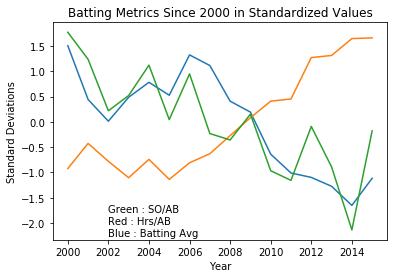

In [12]:
def standardize (column):
    '''formula to standardize values in dataframe'''
    return (column - column.mean())/column.std()

%matplotlib inline 


plt.plot (standardize(battingyear_df))  
plt.xlabel("Year")
plt.ylabel ("Standard Deviations")
plt.text(2002,-2.25,"Green : SO/AB\nRed : Hrs/AB\nBlue : Batting Avg")
plt.title ("Batting Metrics Since 2000 in Standardized Values")

The graph above shows a fairly high degree of correlation between all three bitting statistics. Most notably, we can see a overall downward performance trend in all metrics since 2000. Since then, MLB hitters have been hitting less home runs, striking out more, and have lower batting averages. In reference to our original question, there does not seem to be any year to year trade off in power vs other performance metrics. Rather, hitting has declined across the board. The table below quantifies the correlation as measured by Pearson's R.

In [13]:
battingyear_df.corr('pearson')

,Avg,SO/AB,HR/AB
Avg,1.000000,-0.901130,0.799002
SO/AB,-0.901130,1.000000,-0.687199
HR/AB,0.799002,-0.687199,1.000000


**3. Batting Metrics Correlation by Player**
<br>
However, while the graph above appears to rule out the possibility of a year-to-year trade offs between power and other metrics, it does not address the same question at the level of the individual player. Although we cannot say that a shift away from hitting homeruns since 2000 has resulted in more hits and less strikeouts, we cannot rule out the possibily that such tradeoffs exists somewhere else in the data. The decrease in all perfomance metrics might, for instance, be a result of better pitching or tougher tests for performance enhancing drugs (P.E.D). Because of this, let's try analyzing the same data by player instead of by year.

In [14]:
batting_recent_df = batting_df[batting_df["yearID"]>=2000] 
# parse data since 2000

batting_ab_over_250_df = batting_recent_df[batting_recent_df["AB"]>=250]
# parse data for players with at least 250 at bats per season

battingplayer_df = batting_ab_over_250_df.groupby("playerID").sum()
# group by player

battingplayer_df = get_stats_per_ab (battingplayer_df)
#call function to get totals for each players career by abs

battingplayer_df.describe()

,Avg,SO/AB,HR/AB
count,1023.000000,1023.000000,1023.000000
mean,0.265025,0.200475,0.029594
std,0.022732,0.062295,0.015955
min,0.167742,0.063345,0.000000
25%,0.251133,0.155337,0.017646
50%,0.265891,0.195652,0.028222
75%,0.280357,0.237529,0.040817
max,0.328990,0.432258,0.110286


In the above code, I first parsed the data as before to look at only the last 15 years of baseball statistics. This time, I also parsed the data to eliminate any rows with less than 250 at bats in a season. I did this because instead of looking at total trends across years, I want to focus on the trends between individual players who hit regularly throughout the season. Discarding data of less than 250 abs per season eliminates all hitters who were not healthy or productive enough to play somewhat regularly throughout a season. The stats above represent what managers expect from their players in order for them to start regualarly and to keep playing in the major leagues.
<br> 
<br>
The formula below takes in player statistics and returns the average value and the value at one stanadard deviation above the average. My methodology is to analyze players with hitting statistics one standard deviation above the mean for batting average, homeruns/AB, strikeouts/AB. I am interested in exploring if any of the other perfomance metrics might decrease amoung hitters who perform the best in other categories.

In [16]:
battingplayer_df.describe()

def performance_indicators (column):
    '''Returns the average and one standard deviation above a specified column in the battingplayer_df dataframe'''
    avg = battingplayer_df[column].mean()
    one_std = avg + battingplayer_df[column].std()
    return avg, one_std
    
battingavg_avg, battingavg_onestd = performance_indicators ("Avg")                                       
hrs_avg, hrs_onestd = performance_indicators ("HR/AB")
strikeouts_avg, strikeouts_onestd = performance_indicators ("SO/AB")

# Since less strikeouts is better than more strikeouts, this variable needs to be updated to get top performers

strikeouts_onestd = strikeouts_avg - battingplayer_df["SO/AB"].std()


In [17]:
def compare_player_types (player_type):
    '''Takes in value for batting avg, HR/AB, SO/AB and compares to league average in the last 15 years /
        for hittings with over 250 at bats per season ''' 
    number = len (player_type)
    hits = len (player_type[player_type["Avg"]>=battingavg_avg])
    power = len (player_type[player_type["HR/AB"]>=hrs_avg])
    contact  = len (player_type[player_type["SO/AB"]<=strikeouts_avg])
    print (number, hits, power, contact)
    
power_hitters = battingplayer_df[battingplayer_df["HR/AB"]>=hrs_onestd]
high_avg_hitters = battingplayer_df[battingplayer_df["Avg"]>= battingavg_onestd] 
contact_hitters = battingplayer_df[battingplayer_df["SO/AB"]<=strikeouts_onestd]


The code distinguishes power hitters as players who hit a home runs per at bat above or equal to one standard deviation. In the last 15 years, of the 176 players that qualify, 95 or approximately 54% have batting averages above average; however only 46 or around 26% strikeout less than average.

In [18]:
compare_player_types (power_hitters) 


(176, 95, 176, 46)


Of the 140 players who have a batting average one standard deviation above the mean, 69 or around 49% have above average power, while 109 or 78% have above average strikeout rate.


In [19]:
compare_player_types (high_avg_hitters)


(140, 140, 69, 109)


Of the 173 players who qualify as contact hitters, 135 or 78% have a better than average batting average, but only 18% have above average power.


In [20]:
compare_player_types (contact_hitters)


(173, 135, 31, 173)


From our analysis this far, while there does not seem to be much of a trade off between power and batting average, there does seem to be a trade off between power and number of strikeouts.
<br>
<br>
In the first case we have seen that players who hit a lot of home runs are 54% likely to be players who also have a batting average above the mean. Conversely, players who have a really good batting average are 49% likely to hit more homeruns than average. However, of the players that strike out the least only 18% have above average power; and of the players who hit the most homeruns, 74% strike out more than average.
<br>
<br>
The negative correlation and trade-off between power and contact is visible from the below scatterplot. Here I have graphed contact hitters and power hitters on a scatterplot with homeruns per ab on the y axis and strikeouts per ab on the x axis. The dashed lines represent averages for homeruns and strikeouts per at bat. Most of the contact hitters are clustered around the bottom left of the graph representing strong contact and below average power. Most of the power hitters are clustered to the top right - representing strong power and below average contact. Lastly, overlaps are highlighted in yellow showing that in some rarer cases a player with excellent power can also have excellent contact. However of the 349 hitters represented, there are only 9 cases with overlapping values.

9


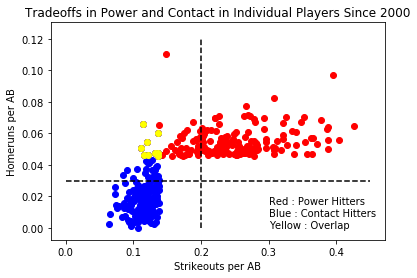

In [21]:
power_contact_hitters = power_hitters[power_hitters["SO/AB"]<= strikeouts_onestd]
print len (power_contact_hitters)

%matplotlib inline 

plt.scatter(power_hitters["SO/AB"], power_hitters["HR/AB"],color="red")
plt.scatter(contact_hitters["SO/AB"], contact_hitters["HR/AB"],color="blue")
plt.scatter(power_contact_hitters["SO/AB"], power_contact_hitters["HR/AB"], color ="yellow")
plt.vlines(strikeouts_avg.astype(float), 0, 0.12, linestyles='dashed')
plt.hlines(hrs_avg.astype(float), 0, .45,linestyles='dashed')


plt.xlabel("Strikeouts per AB")
plt.ylabel ("Homeruns per AB")
plt.title ("Tradeoffs in Power and Contact in Individual Players Since 2000")
plt.text (.3, 0, "Red : Power Hitters\nBlue : Contact Hitters\nYellow : Overlap")


There is less of a trade off evident between power and batting average. The below scatter plot shows approximately half of power hitters also have above average batting average. Also, approximately half hitters with great batting averages also have above average power. Of the 316 hitters graphed, there were 33 overlapping points - representing players with excellent power and excellent batting average.


33


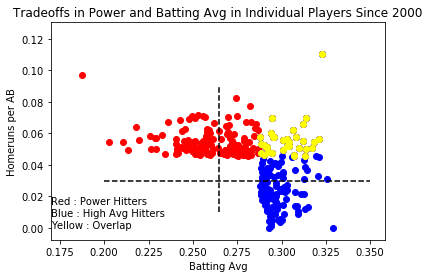

In [22]:
power_high_avg_hitters = power_hitters[power_hitters["Avg"]>= battingavg_onestd]
print len (power_high_avg_hitters)


plt.scatter(power_hitters["Avg"], power_hitters["HR/AB"],color="red")
plt.scatter(high_avg_hitters["Avg"], high_avg_hitters["HR/AB"],color="blue")
plt.scatter(power_high_avg_hitters["Avg"], power_high_avg_hitters["HR/AB"], color ="yellow")
plt.hlines(hrs_avg.astype(float), .2, .35,linestyles='dashed')
plt.vlines(battingavg_avg.astype(float), .01, .09,linestyles='dashed')



plt.xlabel("Batting Avg")
plt.ylabel ("Homeruns per AB")
plt.title ("Tradeoffs in Power and Batting Avg in Individual Players Since 2000")
plt.text (.17, 0, "Red : Power Hitters\nBlue : High Avg Hitters\nYellow : Overlap")

**4. Conclusions**

Analysis of the data suggest several conclusions:

- There exist certain elite baseball players who can generate a large number of homeruns while maintaining an outstanding performance in all baseball hitting categories.
- Such elite baseball players however are sufficently rare to suggest that power is only one metric among others. Hitting a large number of homeruns shows very little correspondance to a higher batting average for instance.
- In fact, there is significant evidence of a trade off between power and contact. This tradeoff is interesting especially because there is also strong evidence of a correlation between contact and batting average. Further investigation might try analyze the causal links between across the range of these metrics. If more HRs corresponds to more strikeouts, and more strikeouts corresponds to a lower batting average; to what extent does the aim of hitting more power detract from a player's batting average? Might power-hitters, in this case, become more valuable if they transitioned away from homeruns to being more well-rounded players?

Answering question such as these would require more sophisticated analysis to what is detailed here. Yet such analysis might also provide support for the tentative conclusions above.

**5. Limitations**

There are three limitations to my analysis:

- I have addressed trade offs between hitting metrics among players whose perfomance is much higher than the mean. I have not extended the analysis to look at any general trends or correlations across the entirity of the data.

- While taking an average of averages of perfomance metrics provided a measure for standard deviation, it is also problematic in that it does not provide a true average across all the data. In my analysis a player with 250 at bats in a season is weighed just as much as another with 500 at bats in a season. 
- Lastly, while this 250 at bats per season seems like an good intutive measure of a hitter's regularity, it is not mathmatically justified. Lowering or increasing this measure of 250 would affect the results of my analysis.